In [1]:
import numpy as np
import pandas as pd

%precision 3
pd.set_option('precision', 3)

In [2]:
df = pd.read_csv('../data/ch2_scores_em.csv')

In [3]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores,
                          'mathematics':ma_scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='student'))
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


# 3.1 두 데이터 사의의 관계를 나타내는 지표

## 3.1.1 공분산covariance

* 양의 상관관계: A가 늘면 B가 늘어난다, A가 줄면 B가 준다
* X편차와 Y편차를 곱한 값의 평균
* 공분산이 분산과 다른 점은 가로축과 세로축의 데이터가 다르기 때문에 편차들로 만든 도형이 직사각형이 될 뿐만 아니라 음의 면적도 얻을 수 있다
* numpy에서 공분산은 cov 함수로 구할 수 있다: 반환값은 공분산행렬covariance matrix 또는 분산공분산 행렬 variance-covariance matrix로 나온다

In [4]:
summary_df = scores_df.copy()
summary_df['english_deviation'] =\
    summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation'] =\
    summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviations'] =\
    summary_df['english_deviation'] * summary_df['mathematics_deviation']
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [5]:
summary_df['product of deviations'].mean()

62.8

In [20]:
summary_df['english'].var(ddof=0)

86.0

In [21]:
summary_df['mathematics'].var(ddof=0)

68.44000000000001

In [7]:
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

[1,1]이 첫 번째 인수인 영어,   
[2,2]이 두 번째 인수인 수학에 대응한다.

[1,2], [2,1] 영어와 수학의 공분산에 해당

In [8]:
cov_mat[0, 1], cov_mat[1, 0]

(62.800000000000004, 62.800000000000004)

In [9]:
np.var(en_scores, ddof=0), np.var(ma_scores, ddof=0)

(86.0, 68.44000000000001)

## 3.1.2 상관계수correlation coefficient

* 상관계수는 -1과 1 사이의 값을 취하고 양의 상관관계에 놓여있을 수록 1에 가까워진다. 0이면 무상관

In [10]:
np.cov(en_scores, ma_scores, ddof=0)[0, 1] /\
    (np.std(en_scores) * np.std(ma_scores))

0.8185692341186713

In [11]:
np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [ ]:
numpy는 corrcoef 함수로 계산할 ㅅ 있

In [12]:
scores_df.corr()

,english,mathematics
english,1.000,0.819
mathematics,0.819,1.000


# 3.2 2차원 데이터의 시각화

In [13]:
import matplotlib.pyplot as plt

%matplotlib inline

## 3.2.1 산점도scatter
x축이 첫번째 인수, y축이 두 번째 인수

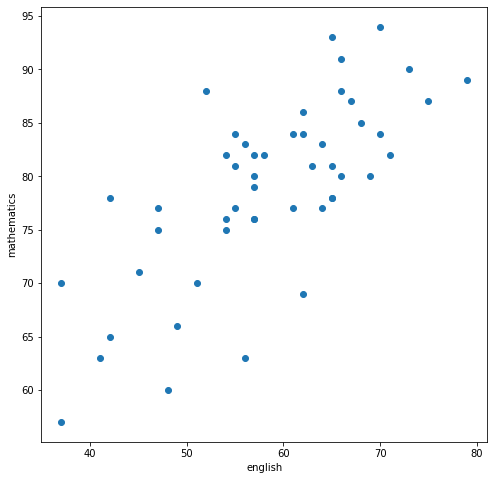

In [14]:
english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
# 산점도
ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()

## 3.2.2 회귀직선regression line
뭔가 산포도를 대표로 표현해줄 수 있는 직선인 듯

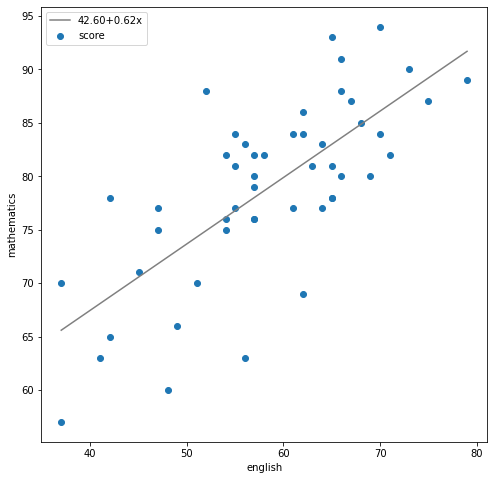

In [17]:
# 계수β_0와β_1를 구한다
poly_fit = np.polyfit(english_scores, math_scores, 1)
# β_0+β_1 x를 반환하는 함수를 작성
poly_1d = np.poly1d(poly_fit)
# 직선을 그리기 위해 x좌표를 생성
xs = np.linspace(english_scores.min(), english_scores.max())
# xs에 대응하는 y좌표를 구한다
ys = poly_1d(xs)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.scatter(english_scores, math_scores, label='score')
ax.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
# 범례의 표시
ax.legend(loc='upper left')

plt.show()

In [22]:
poly_1d

poly1d([ 0.621, 42.601])

In [23]:
poly_fit

array([ 0.621, 42.601])